In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
mydata = pd.read_csv('insurance.csv')

In [3]:
mydata

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# checking basic info about the data

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
mydata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
mydata.shape

(1338, 7)

In [8]:
# checking null values

In [9]:
mydata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# checking corelation

In [11]:
mydata_corr = mydata.corr()

In [12]:
mydata_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [13]:
# visualizing through seaborn

<AxesSubplot:>

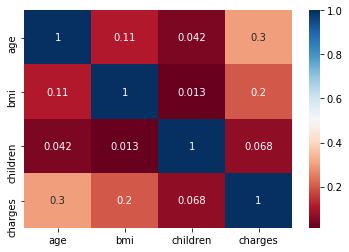

In [14]:
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

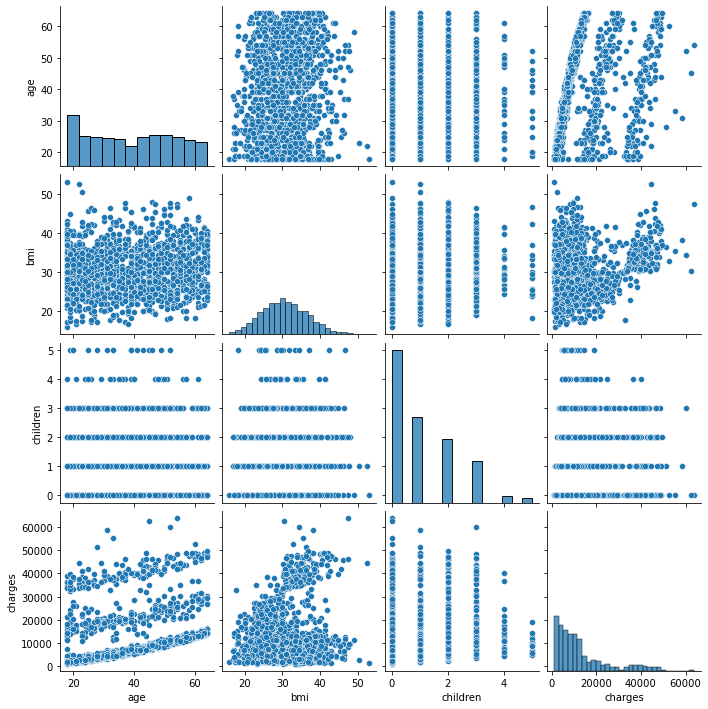

In [15]:
sns.pairplot(mydata)

# EDA

Text(0.5, 1.0, 'Distribution of charges')

<Figure size 720x432 with 0 Axes>

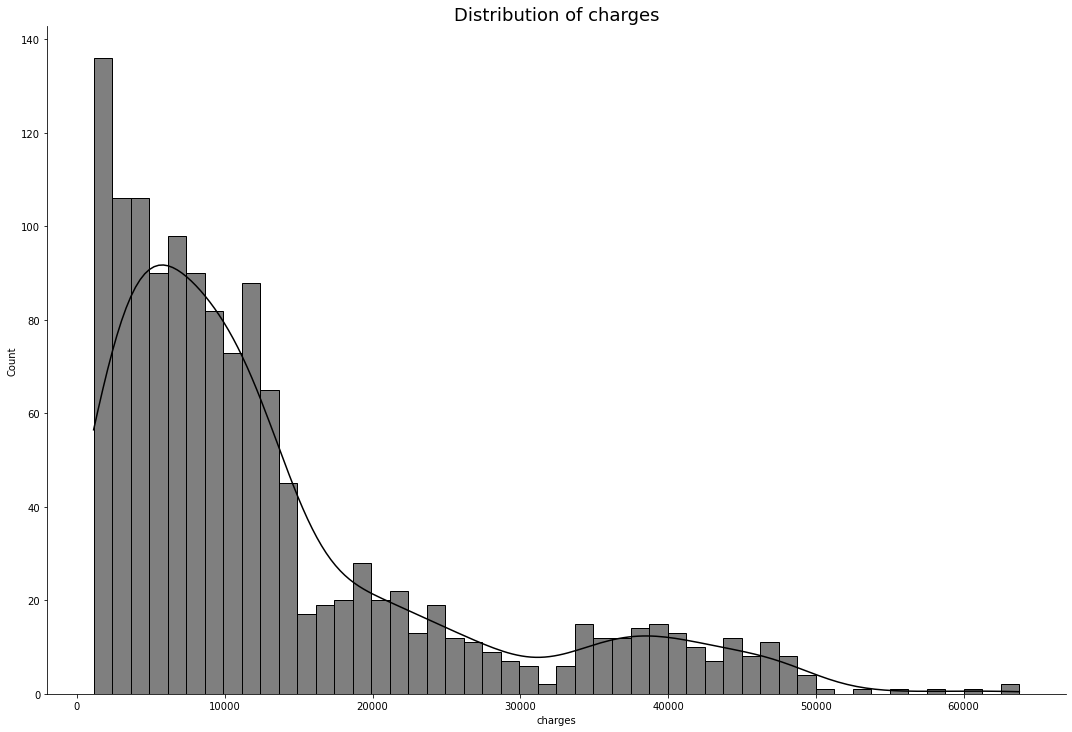

In [19]:
plt.figure(figsize = (10, 6))
sns.displot(x = 'charges', data = mydata, bins = 50, kde = True, height = 10, aspect = 1.5, color = 'Black')
plt.title('Distribution of charges', fontsize = 18)

In [23]:
def boxplot(col_name):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (14, 10))
    sns.boxplot(ax = axes[0], x = col_name , y = 'charges', data = mydata, 
                width = 1, palette = 'magma')
    axes[0].ticklabel_format(style = 'plain', axis = 'y')
    axes[0].set_title((col_name + ' vs Medical Charges'), fontsize = 16)

    sns.countplot(ax = axes[1], x = col_name , data = mydata, palette = 'magma')
    axes[1].set_title((col_name + ' Count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.4)

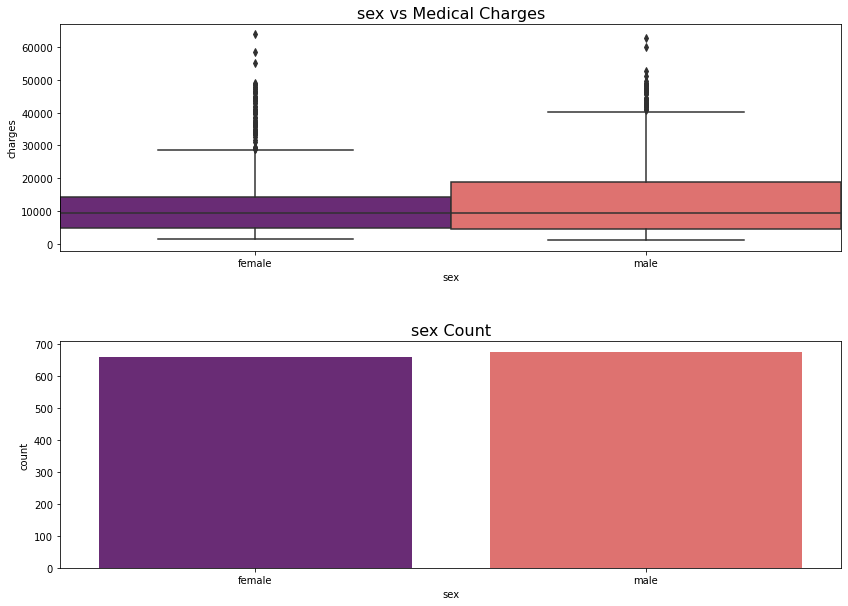

In [24]:
boxplot('sex')

# boxplot for various regions

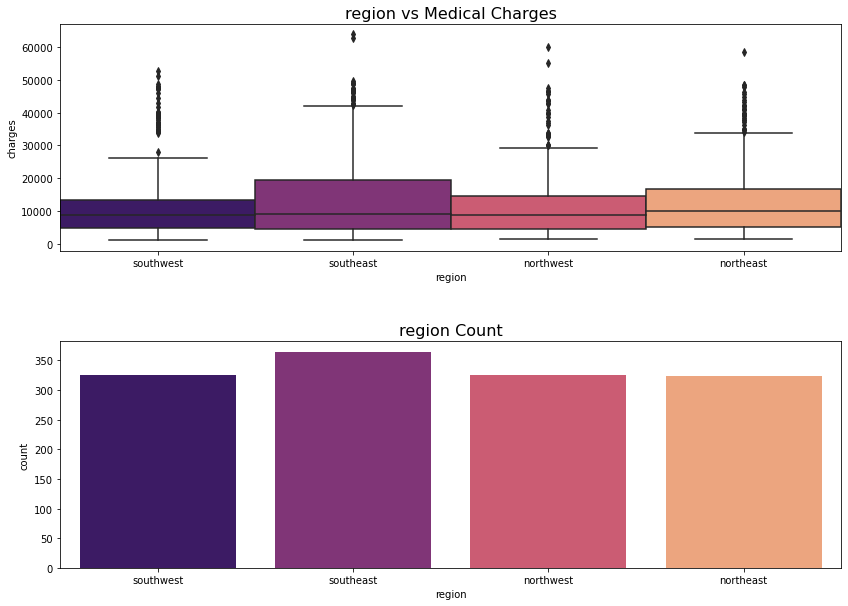

In [26]:
boxplot('region')

# boxplot for smoker vs non smoker

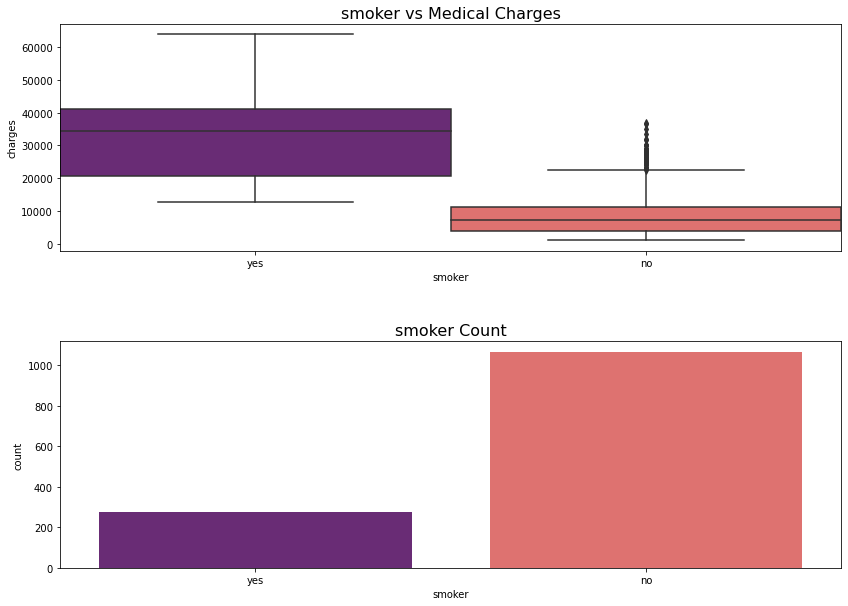

In [27]:
boxplot('smoker')

# creating numercial values for categorical columns using label encoder

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()

In [30]:
mydata['sex']=le.fit_transform(mydata.sex)

In [31]:
mydata['region']=le.fit_transform(mydata.region)

In [33]:
mydata['smoker']=le.fit_transform(mydata.smoker)

In [34]:
mydata.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [35]:
# splitting independent and dependent variables

In [36]:
x_ind = mydata.drop('charges', axis=1)

In [37]:
x_ind

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [38]:
y_dep=mydata.charges

In [39]:
y_dep

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [40]:
# splitting data into training and testing

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,train_size=0.8, random_state=2)

In [43]:
import statsmodels.api as sm

In [44]:
model=sm.OLS(y_dep,x_ind)

In [45]:
my_fit=model.fit()

In [46]:
my_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1537.
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                        0.00
Time:                        20:29:59   Log-Likelihood:                         -13621.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1332   BIC:                                  2.729e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          199.5462     11.538     17.295      0.000     176.912     222.180
sex         -693.5223    347.997     -1.993      0.046   -1376.205     -10.840
bmi           62.3100     18.013      3.459      0.001      26.973      97.647
children     265.5263    144.137      1.842      0.066     -17.234     548.286
smoker       2.34e+04    433.195     54.006      0.000    2.25e+04    2.42e+04
region      -553.9940    159.449     -3.474      0.001    -866.792    -241.196
==============================================================================
Omnibus:                      272.456   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              625.386
Skew:                           1.120   Prob(JB):                    1.58e-136
Kurtosis:                       5.491   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Linear regression model

In [73]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [67]:
def accuracy_score(model):
    y_pred = model.predict(x_test)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    mse = (mean_squared_error(y_test, y_pred))
    rmse = np.sqrt(mse)
    print('Training accuracy is ', train_acc)
    print('Testing accuracy is ', test_acc)
    print('Root Mean Square Error is ', rmse)
    return [(train_acc * 100), (test_acc * 100) , rmse]

In [68]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [71]:
accuracy_score(model1)

Training accuracy is  0.7519923667088932
Testing accuracy is  0.7445422986536503
Root Mean Square Error is  6193.935113523997


[75.19923667088932, 74.45422986536502, 6193.935113523997]

# Lasso model

In [74]:
model2=Lasso(10)
model2.fit(x_train,y_train)

Lasso(alpha=10)

In [75]:
accuracy_score(model2)

Training accuracy is  0.7519848996701413
Testing accuracy is  0.744583912312038
Root Mean Square Error is  6193.430601825488


[75.19848996701413, 74.4583912312038, 6193.430601825488]

# Ridge model

In [76]:
model3=Ridge(0.1)
model3.fit(x_train,y_train)

Ridge(alpha=0.1)

In [77]:
accuracy_score(model3)

Training accuracy is  0.7519921551543267
Testing accuracy is  0.7445549576821596
Root Mean Square Error is  6193.78164355191


[75.19921551543267, 74.45549576821597, 6193.78164355191]

# decision tree, k-nearest neighbour, random forest models

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# decision tree model

In [80]:
model4 = DecisionTreeRegressor(max_depth = 3)
model4.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [81]:
accuracy_score(model4)

Training accuracy is  0.8582042344756327
Testing accuracy is  0.8509231896803976
Root Mean Square Error is  4731.645478837548


[85.82042344756327, 85.09231896803976, 4731.645478837548]

# random forest model

In [83]:
model5 = RandomForestRegressor(max_depth = 4)
model5.fit(x_train, y_train)

RandomForestRegressor(max_depth=4)

In [84]:
accuracy_score(model5)

Training accuracy is  0.8754348112792862
Testing accuracy is  0.8632718006324691
Root Mean Square Error is  4531.439631916921


[87.54348112792863, 86.32718006324691, 4531.439631916921]

# XG BOOST regressor

In [86]:
model6 = XGBRegressor(max_depth = 2, learning_rate = 0.1)
model6.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
accuracy_score(model6)

Training accuracy is  0.8787206631065813
Testing accuracy is  0.8713729093678524
Root Mean Square Error is  4395.146693407601


[87.87206631065813, 87.13729093678523, 4395.146693407601]

In [88]:
results = pd.DataFrame(columns = ['Training Accuracy', 'Testing Accuracy', 'Root Mean Squared Error'],
                      index = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 
                               'Decision Tree Regression', 'Random Forest Regression', 'XGBoost Regression'])

In [89]:
results.loc['Linear Regression'] = accuracy_score(model1)
results.loc['Lasso Regression'] = accuracy_score(model2)
results.loc['Ridge Regression'] = accuracy_score(model3)
results.loc['Decision Tree Regression'] = accuracy_score(model4)
results.loc['Random Forest Regression'] = accuracy_score(model5)
results.loc['XGBoost Regression'] = accuracy_score(model6)

Training accuracy is  0.7519923667088932
Testing accuracy is  0.7445422986536503
Root Mean Square Error is  6193.935113523997
Training accuracy is  0.7519848996701413
Testing accuracy is  0.744583912312038
Root Mean Square Error is  6193.430601825488
Training accuracy is  0.7519921551543267
Testing accuracy is  0.7445549576821596
Root Mean Square Error is  6193.78164355191
Training accuracy is  0.8582042344756327
Testing accuracy is  0.8509231896803976
Root Mean Square Error is  4731.645478837548
Training accuracy is  0.8754348112792862
Testing accuracy is  0.8632718006324691
Root Mean Square Error is  4531.439631916921
Training accuracy is  0.8787206631065813
Testing accuracy is  0.8713729093678524
Root Mean Square Error is  4395.146693407601


In [90]:
results

,Training Accuracy,Testing Accuracy,Root Mean Squared Error
Linear Regression,75.199237,74.45423,6193.935114
Lasso Regression,75.19849,74.458391,6193.430602
Ridge Regression,75.199216,74.455496,6193.781644
Decision Tree Regression,85.820423,85.092319,4731.645479
Random Forest Regression,87.543481,86.32718,4531.439632
XGBoost Regression,87.872066,87.137291,4395.146693


# conclusion

In [91]:
# XG BOOST works well with high accuracy and least error
# random forest also works well with low error